In [1]:
from fastai.vision import *
from fastai.metrics import error_rate
import ctypes
ctypes.cdll.LoadLibrary('caffe2_nvrtc.dll')

<CDLL 'caffe2_nvrtc.dll', handle 7fe8f7a0000 at 0x4d10b50>

In [2]:
bs = 8

In [3]:
path = Path('E:/Train/')

In [4]:
#for file, folder in [('Modi.txt', 'Modi'), ('Kejriwal.txt', 'Kejriwal') ]:
 #   dest = path/folder # path + '/' + folder
  #  dest.mkdir(parents=True, exist_ok=True)
   # download_images(path/file, dest, max_pics=200)

In [5]:
#for folder in ('Modi','Kejriwal'):
   # print(folder)
   # verify_images(path/folder, delete=True, max_size=500)

In [6]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=4, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)
data.classes

['Kejriwal', 'Modi']

In [7]:
#data.show_batch(rows=3, figsize=(7, 8))


In [8]:
#data.classes, data.c, len(data.train_ds), len(data.valid_ds)

In [9]:
import ipywidgets


In [10]:

learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [11]:

learn


Learner(data=ImageDataBunch;

Train: LabelList (30 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Kejriwal,Kejriwal,Kejriwal,Kejriwal,Kejriwal
Path: E:\Train;

Valid: LabelList (262 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Kejriwal,Modi,Kejriwal,Modi,Modi
Path: E:\Train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True,

In [13]:
torch.cuda.empty_cache()

defaults.device = torch.device('cuda')
volatile=True# makes sure the gpu is used
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.423876,0.570749,0.187023,00:29
1,0.555216,0.382292,0.099237,00:31
2,0.546982,0.315606,0.083969,00:31
3,0.406505,0.308235,0.083969,00:31


In [14]:
learn.save('Phase1')


In [35]:
learn.unfreeze()

In [39]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


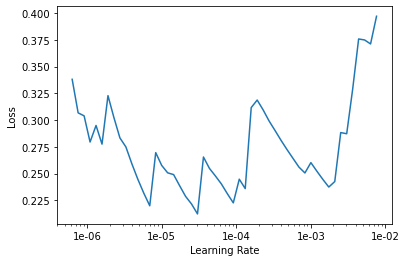

In [40]:
learn.recorder.plot()

In [15]:
interp = ClassificationInterpretation.from_learner(learn)

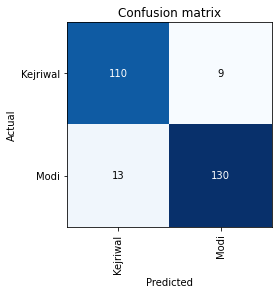

In [16]:
interp.plot_confusion_matrix()

In [34]:
img = open_image('E:/Train/2.jpg')
pred_class = learn.predict(img)
pred_class

(Category Kejriwal, tensor(0), tensor([9.9933e-01, 6.6900e-04]))